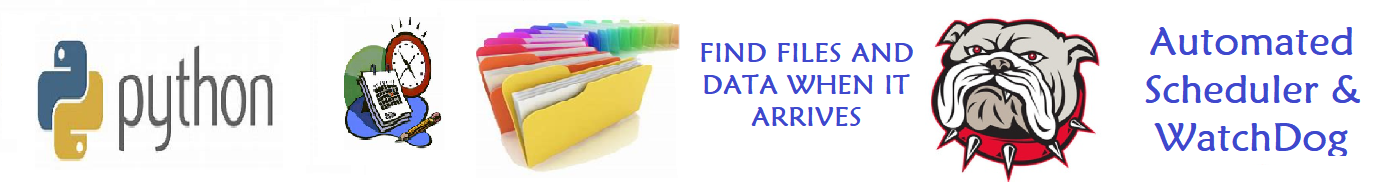

# Instant_Summary
#### by Joe Eberle started on 05-23-2023

In [1]:
import os
import schedule
import time

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'Instant_Summary'

## Optional Step 0 - Intitiate Logging 

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_Start(solution_name, start_time) 
logging.info(f'{solution_name} -Optional Step 0 - Intitiate Logging')

In [15]:
logging.info(f'{solution_name} - Step 1 - Load ANY data set for which to run discovery or data profiling')          
# heart_data_filename = 'C:\\Data_Science_Data\\Test_Data\\healthcare\\heart_data.csv'
# fetal_health_filename = 'C:\\Data_Science_Data\\Test_Data\\healthcare\\fetal_health.csv'
# diabetes_data_filename = 'C:\\Data_Science_Data\\Test_Data\\healthcare\\diabetes_data.csv'
# stroke_data_filename = 'C:\\Data_Science_Data\\Test_Data\\healthcare\\stroke_data.csv'
# hypertension_data_filename = 'C:\\Data_Science_Data\\Test_Data\\healthcare\\hypertension_data.csv'
aihs_data_filename = 'C:\\working_directory\\excel\\AIHS_patient.xlsx'
df = pd.read_csv(heart_data_filename)

logging.info(f'{solution_name} - Step 1 - Load ANY data set for which to run discovery or data profiling')          

# df = pd.read_csv(aihs_data_filename)
df = pd.read_excel(aihs_data_filename)


In [14]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Step 1 - automatically create summary dataframe for any data set

In [17]:
import pandas as pd

def generate_summary_dataframes(df):
    group_columns = []
    aggregate_columns = []

    for column in df.columns:
        if df[column].dtype == 'object' or df[column].nunique() < len(df) * 0.1:
            group_columns.append(column)
        else:
            aggregate_columns.append(column)

    summary_dataframes = []
    if group_columns:
        groups = df.groupby(group_columns)
        for name, group in groups:
            summary_df = group[aggregate_columns].agg(['count', 'mean', 'sum'])
            summary_dataframes.append((name, summary_df))

    return summary_dataframes

# Example usage
# Assuming you have a DataFrame called 'data' that you want to summarize
summary_data = generate_summary_dataframes(df)

# Printing the summary DataFrames
for name, summary_df in summary_data:
    print(f"Summary for Group: {name}")
    print(summary_df)
    print()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

def generate_summary_dataframes(df):
    group_columns = []
    aggregate_columns = []

    for column in df.columns:
        if df[column].dtype == 'object' or df[column].nunique() < len(df) * 0.1:
            group_columns.append(column)
        else:
            aggregate_columns.append(column)

    summary_dataframes = []
    plot_images = []
    
    if group_columns:
        groups = df.groupby(group_columns)
        for name, group in groups:
            summary_df = group[aggregate_columns].agg(['count', 'mean', 'sum'])
            summary_dataframes.append((name, summary_df))

            # Generate Seaborn or Matplotlib graph
            images = []
            for col in aggregate_columns:
                plt.figure()
                sns.barplot(x=group_columns, y=col, data=group.reset_index())
                plt.title(f"{col} by {', '.join(group_columns)}")
                
                # Save plot as image
                buf = io.BytesIO()
                plt.savefig(buf, format='png')
                buf.seek(0)
                images.append(buf)
                plt.close()
            
            plot_images.append(images)

    return summary_dataframes, plot_images

# Example usage
# Assuming you have a DataFrame called 'data' that you want to summarize
summary_data, plot_images = generate_summary_dataframes(data)

# Printing the summary DataFrames
for i, (name, summary_df) in enumerate(summary_data):
    print(f"Summary for Group: {name}")
    print(summary_df)
    print()
    
    # Display the images
    images = plot_images[i]
    for img in images:
        img.seek(0)
        # Display the image or save it to a file
        # For example, you can save it using openpyxl
        # sheet.add_image(openpyxl.drawing.image.Image(img), ...)


In [ ]:
logging.info(f'{solution_name} - Step 1 - create watch dog functions to check for data files, mapped Drives and directories')

def check_file_existence(directory, filename):
    file_path = os.path.join(directory, filename)
    if os.path.exists(file_path):
        print("File exists in the specified directory.")
    else:
        print("File does not exist in the specified directory.")

def check_mapped_drive_existence(drive_letter):
    drive_path = drive_letter + ":\\"
    if os.path.exists(drive_path):
        print("Mapped drive exists.")
    else:
        print("Mapped drive does not exist.")

def check_directory_existence(directory):
    if os.path.exists(directory):
        print("Directory exists.")
    else:
        print("Directory does not exist.")

In [ ]:
testing_and_developing = True

if testing_and_developing: 
    # Check for mapped drive existence
    directory = "/path/to/directory"
    filename = "example.txt"
    check_file_existence(directory, filename)    

    # Check for mapped drive existence
    drive_letter = "Z"
    check_mapped_drive_existence(drive_letter)

    # Check for directory existence
    specific_directory = "/path/to/specific/directory"
    check_directory_existence(specific_directory)

In [ ]:
def check_file_scheduler(directory, filename, interval_minutes=None, specific_time=None):
    if interval_minutes:
        schedule.every(interval_minutes).minutes.do(check_file_existence, directory=directory, filename=filename)
    elif specific_time:
        schedule.every().day.at(specific_time).do(check_file_existence, directory=directory, filename=filename)
    else:
        print("Invalid scheduler configuration.")

    while True:
        schedule.run_pending()
        time.sleep(1)


In [ ]:
testing_and_developing = False

if testing_and_developing: 
    
    directory = "/path/to/directory"
    filename = "example.txt"
    
    # Check every 15 minutes
#     check_file_scheduler(directory, filename, interval_minutes=15)
    # Check every 1 minutes
    check_file_scheduler(directory, filename, interval_minutes=1)    

    # Check at a specific time of day (e.g., 9:30 AM)
#     check_file_scheduler(directory, filename, specific_time="09:30")

## Step 0 - Process End - display log

In [ ]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

In [ ]:
# ==============================================================
#                  File Existence Watchdog Documentation
# ==============================================================

# Overview:
# ----------
# The File Existence Watchdog is a Python program that allows you to check for the existence of a file in a specified 
# directory at regular intervals or at a specific time of day. 
# It also provides additional functions to check for the existence of a mapped drive and a specific directory. 
# The program utilizes the `os.path` module to perform file and directory existence checks.

# Functionality:
# --------------
# 1. Check File Existence:
#    - The program allows you to specify a directory path and a filename.
#    - It checks if the file exists in the specified directory using `os.path.exists()`.
#    - It prints a message indicating whether the file exists or not.

# 2. Scheduler:
#    - The program includes a scheduler functionality using the `schedule` library.
#    - You can configure the scheduler to check for file existence at regular intervals or at a specific time of day.
#    - The scheduler triggers the file existence check function based on the specified configuration.

# 3. Check Mapped Drive Existence:
#    - The program allows you to check if a specific mapped drive exists.
#    - You can provide the drive letter, and it checks if the corresponding drive is mapped using `os.path.exists()`.

# 4. Check Directory Existence:
#    - The program enables you to check if a specific directory exists.
#    - You can provide the directory path, and it checks if the directory exists using `os.path.exists()`.

# Usefulness of Watchdog:
# ------------------------
# Having a watchdog to discover when new data files arrive can be highly beneficial in various scenarios, including:

# 1. Real-time Data Processing:
#    - In data processing applications that require immediate actions upon the arrival of new data files, a watchdog 
#      can continuously monitor the directory for the presence of new files.
#    - The scheduler functionality provided by the program allows you to automate this monitoring process 
#      at regular intervals or specific times of the day.

# 2. Automated Workflows:
#    - Automated workflows often rely on the availability of specific files or directories.
#    - By regularly checking the existence of these resources, the watchdog can trigger subsequent actions or 
#      workflows as soon as the required files or directories become available.

# 3. System Monitoring:
#    - The watchdog can be used to monitor the existence of critical system files or directories.
#    - It can raise alerts or initiate appropriate actions if any of the essential resources are missing or inaccessible.

# 4. Batch Processing:
#    - In batch processing scenarios, where large volumes of data files need to be processed sequentially, the watchdog
#      can help identify when a new batch of files has arrived.
#    - This information can be used to start the processing of the new batch promptly, ensuring timely completion of 
#      the overall workflow.

# By utilizing the File Existence Watchdog, you can effectively monitor the existence of files, mapped drives, 
# and directories, enabling timely responses or actions based on the availability of these resources.


